Nilai produksi yang dihasilkan: 5666.67


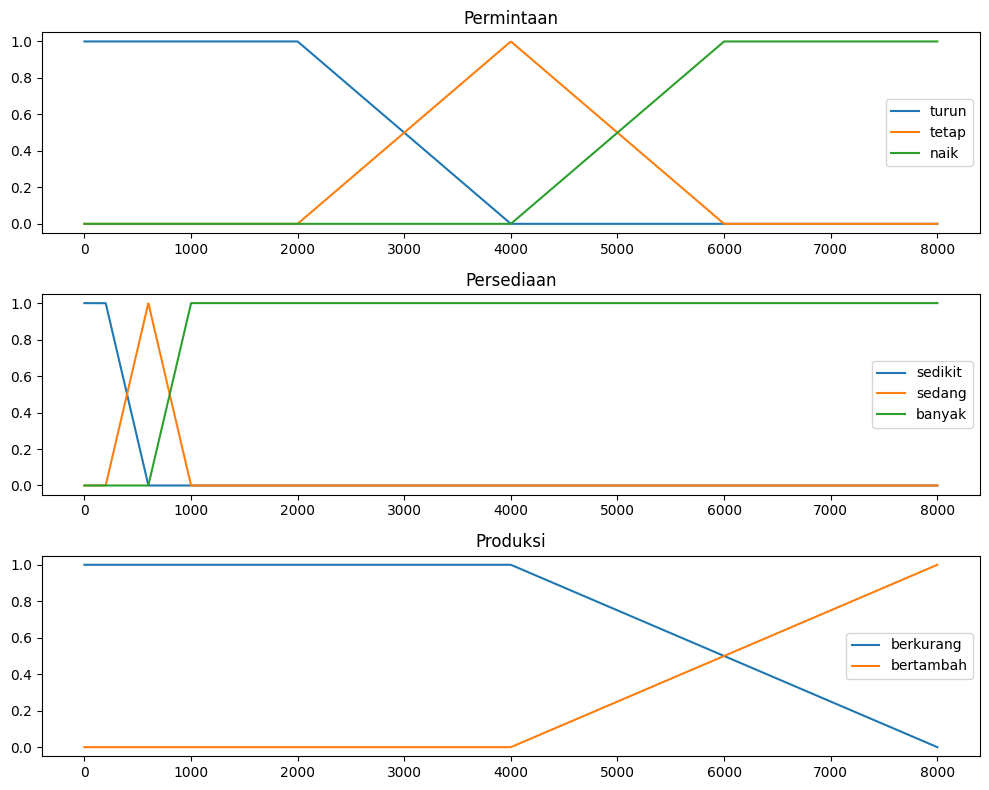

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi keanggotaan untuk Permintaan
def permintaan_turun(x):
    return np.maximum(0, np.minimum(1, (4000 - x) / 2000))

def permintaan_tetap(x):
    return np.maximum(0, np.minimum((x - 2000) / 2000, (6000 - x) / 2000))

def permintaan_naik(x):
    return np.maximum(0, np.minimum(1, (x - 4000) / 2000))

# Fungsi keanggotaan untuk Persediaan
def persediaan_sedikit(x):
    return np.maximum(0, np.minimum(1, (600 - x) / 400))

def persediaan_sedang(x):
    return np.maximum(0, np.minimum((x - 200) / 400, (1000 - x) / 400))

def persediaan_banyak(x):
    return np.maximum(0, np.minimum(1, (x - 600) / 400))

# Fungsi keanggotaan untuk Produksi
def produksi_berkurang(x):
    return np.maximum(0, np.minimum(1, (8000 - x) / 4000))

def produksi_bertambah(x):
    return np.maximum(0, np.minimum(1, (x - 4000) / 4000))

# Inferensi Fuzzy
rules = [
    (permintaan_turun, persediaan_sedikit, produksi_bertambah),
    (permintaan_turun, persediaan_sedang, produksi_berkurang),
    (permintaan_turun, persediaan_banyak, produksi_berkurang),
    (permintaan_tetap, persediaan_sedikit, produksi_bertambah),
    (permintaan_tetap, persediaan_sedang, produksi_berkurang),
    (permintaan_tetap, persediaan_banyak, produksi_berkurang),
    (permintaan_naik, persediaan_sedikit, produksi_bertambah),
    (permintaan_naik, persediaan_sedang, produksi_bertambah),
    (permintaan_naik, persediaan_banyak, produksi_berkurang),
]

def fuzzy_inference(permintaan, persediaan):
    z_values = []
    for rule in rules:
        permintaan_func, persediaan_func, produksi_func = rule
        alpha = np.fmin(permintaan_func(permintaan), persediaan_func(persediaan))
        if produksi_func == produksi_berkurang:
            z = 8000 - alpha * 4000
        else:
            z = 4000 + alpha * 4000
        z_values.append((alpha, z))
    return z_values

def defuzzification(z_values):
    numerator = sum(alpha * z for alpha, z in z_values)
    denominator = sum(alpha for alpha, _ in z_values)
    return numerator / denominator if denominator != 0 else 0

# Contoh input
permintaan = 3000  # Nilai permintaan
persediaan = 500   # Nilai persediaan

# Proses inferensi
z_values = fuzzy_inference(permintaan, persediaan)
produksi = defuzzification(z_values)

print(f"Nilai produksi yang dihasilkan: {produksi:.2f}")

# Visualisasi fungsi keanggotaan
x = np.linspace(0, 8000, 1000)
plt.figure(figsize=(10, 8))

plt.subplot(3, 1, 1)
plt.plot(x, permintaan_turun(x), label="turun")
plt.plot(x, permintaan_tetap(x), label="tetap")
plt.plot(x, permintaan_naik(x), label="naik")
plt.title("Permintaan")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(x, persediaan_sedikit(x), label="sedikit")
plt.plot(x, persediaan_sedang(x), label="sedang")
plt.plot(x, persediaan_banyak(x), label="banyak")
plt.title("Persediaan")
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(x, produksi_berkurang(x), label="berkurang")
plt.plot(x, produksi_bertambah(x), label="bertambah")
plt.title("Produksi")
plt.legend()

plt.tight_layout()
plt.show()
